In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
import cv2


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
# normalize image pixel values by dividing 
# by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [4]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


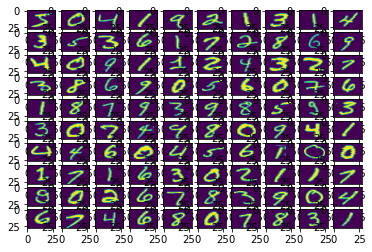

In [5]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), 
                        aspect='auto')
        k += 1
plt.show()

In [13]:
model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),
    
      # dense layer 1
    Dense(256, activation='sigmoid'),  
    
    # dense layer 2
    Dense(128, activation='sigmoid'), 
    
      # output layer
    Dense(10, activation='sigmoid'),  
])

In [17]:
#optimiser adjuts weights and bias, loss_function tries to minimise loss of actual and predicted value
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


model.summary()

In [19]:

model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 1s 20ms/step - loss: 1.8822 - accuracy: 0.5453 - val_loss: 1.3943 - val_accuracy: 0.7372
Epoch 2/10
24/24 [==============================] - 0s 15ms/step - loss: 1.1179 - accuracy: 0.7709 - val_loss: 0.8398 - val_accuracy: 0.8498
Epoch 3/10
24/24 [==============================] - 0s 14ms/step - loss: 0.7303 - accuracy: 0.8443 - val_loss: 0.5738 - val_accuracy: 0.8785
Epoch 4/10
24/24 [==============================] - 0s 14ms/step - loss: 0.5314 - accuracy: 0.8765 - val_loss: 0.4393 - val_accuracy: 0.8929
Epoch 5/10
24/24 [==============================] - 0s 15ms/step - loss: 0.4247 - accuracy: 0.8930 - val_loss: 0.3619 - val_accuracy: 0.9067
Epoch 6/10
24/24 [==============================] - 0s 15ms/step - loss: 0.3629 - accuracy: 0.9027 - val_loss: 0.3176 - val_accuracy: 0.9168
Epoch 7/10
24/24 [==============================] - 0s 15ms/step - loss: 0.3230 - accuracy: 0.9110 - val_loss: 0.2859 - val_accuracy: 0.9211
Epoch 8/10
24

In [20]:
#Accuracy and loss based on test data
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.2462010681629181, 0.9275000095367432]


# Practical Implementation 

In [21]:
img=cv2.imread(r"test_img.jpg",0)

In [22]:
img.shape

(570, 537)

In [23]:
orig = img.copy()

In [24]:
img_resize = cv2.resize(img, (28, 28 ))

In [25]:
new_arr=np.array([img_resize])

In [26]:
result=model.predict(new_arr)

1/1 [==============================] - 0s 60ms/step


C:\Users\krtej\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


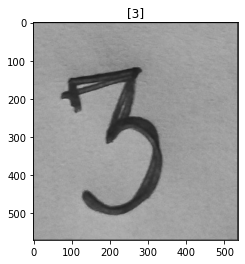

In [27]:
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.title(np.argmax(result, axis=1))
plt.show()

# Output is displayed over the plotted image which matches the user input.  